In [1]:
import pandas
import matplotlib.pyplot as plt

In [2]:
datalink = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
dataset = pandas.read_csv(datalink, usecols=[1], engine='python')

In [3]:
dataset.shape

(144, 1)

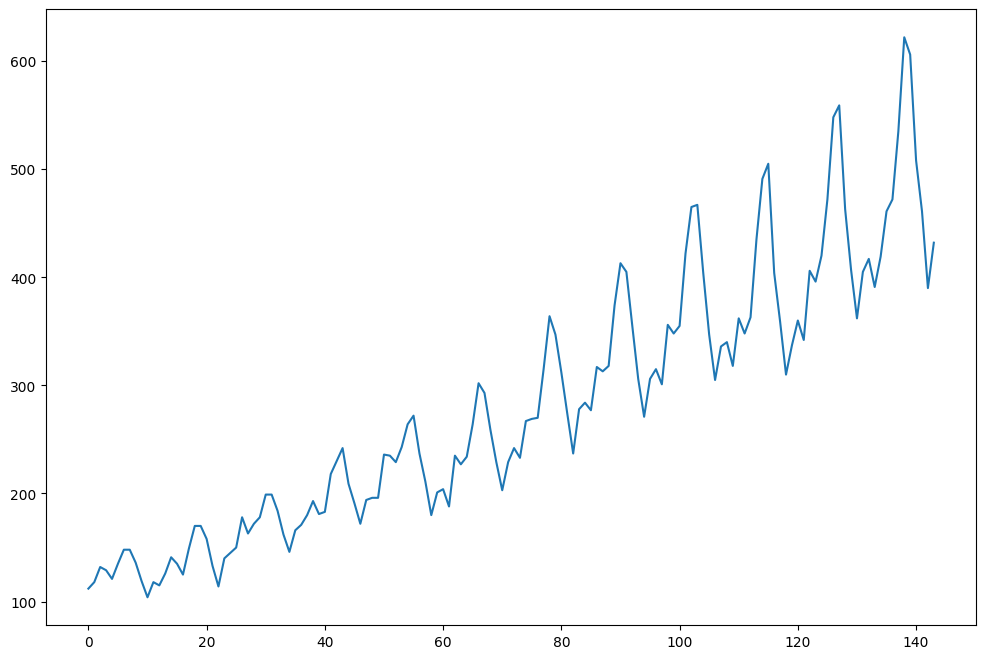

In [4]:
plt.figure(figsize=(12, 8))
plt.plot(dataset)

In [5]:
import tensorflow as tf
tf.random.set_seed(7001)

In [6]:
dataset = dataset.values
dataset = dataset.astype('float32')

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [8]:
train_size = int(len(dataset)*0.07)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [9]:
import numpy as np

In [10]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [11]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [14]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
8/8 - 7s - loss: 0.0040 - 7s/epoch - 917ms/step
Epoch 2/100
8/8 - 0s - loss: 0.0028 - 43ms/epoch - 5ms/step
Epoch 3/100
8/8 - 0s - loss: 0.0019 - 77ms/epoch - 10ms/step
Epoch 4/100
8/8 - 0s - loss: 0.0013 - 68ms/epoch - 8ms/step
Epoch 5/100
8/8 - 0s - loss: 9.2083e-04 - 52ms/epoch - 6ms/step
Epoch 6/100
8/8 - 0s - loss: 7.0015e-04 - 53ms/epoch - 7ms/step
Epoch 7/100
8/8 - 0s - loss: 5.6702e-04 - 63ms/epoch - 8ms/step
Epoch 8/100
8/8 - 0s - loss: 5.0384e-04 - 123ms/epoch - 15ms/step
Epoch 9/100
8/8 - 0s - loss: 4.8545e-04 - 105ms/epoch - 13ms/step
Epoch 10/100
8/8 - 0s - loss: 4.7787e-04 - 85ms/epoch - 11ms/step
Epoch 11/100
8/8 - 0s - loss: 4.7965e-04 - 77ms/epoch - 10ms/step
Epoch 12/100
8/8 - 0s - loss: 4.7905e-04 - 84ms/epoch - 10ms/step
Epoch 13/100
8/8 - 0s - loss: 4.8142e-04 - 61ms/epoch - 8ms/step
Epoch 14/100
8/8 - 0s - loss: 4.8102e-04 - 73ms/epoch - 9ms/step
Epoch 15/100
8/8 - 0s - loss: 4.7736e-04 - 64ms/epoch - 8ms/step
Epoch 16/100
8/8 - 0s - loss: 4.7490e-04 -

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

trainScore = np.sqrt(np.mean(y_train[0] - trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

5/5 [==============================] - 0s 3ms/step
Train Score: nan RMSE
Test Score: 199.15 RMSE


C:\Users\rmkav\AppData\Local\Temp\ipykernel_10464\869214697.py:9: RuntimeWarning: invalid value encountered in sqrt
  trainScore = np.sqrt(np.mean(y_train[0] - trainPredict[:,0]))
